# Importing Data On HealthCare Costs

*Make sure to open terminal and cd to your working directory*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import heart attack data

In [2]:
ha_costs_df = pd.read_csv('data/mmd_heart_attack_data.csv')

*Examine the first 5 rows and the last five rows of the TN heart attack  data.*

In [3]:
ha_costs_df.head(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [4]:
ha_costs_df.tail(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


*Check the data types of each column.*

In [5]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.8+ KB


### Keep only the rows where facilities are in TN

In [6]:
TN_heart = ha_costs_df.query('state == "TENNESSEE"')

*Print the dimensions of the data.*

In [7]:
TN_heart.shape

(91, 17)

*See how many TN counties are represented in the heart attack costs data.*

In [8]:
TN_heart.county.nunique()

91

*See how many counties are classified as Urban and how many as Rural.*

In [9]:
Urb_heart = TN_heart.query('urban =="Urban"')

In [10]:
Urb_heart.shape

(38, 17)

In [11]:
Rur_heart = TN_heart.query('urban =="Rural"')

In [12]:
Rur_heart.shape

(53, 17)

*Examine the distribution of costs.*

In [13]:
TN_heart.describe()

,year,fips,analysis_value
count,91.0,91.000000,91.000000
mean,2017.0,47093.615385,45762.989011
std,0.0,55.338708,6574.670462
min,2017.0,47001.000000,30831.000000
25%,2017.0,47046.000000,41105.500000
50%,2017.0,47093.000000,45384.000000
75%,2017.0,47142.000000,49698.500000
max,2017.0,47189.000000,62641.000000


In [14]:
Urb_heart.describe()

,year,fips,analysis_value
count,38.0,38.000000,38.000000
mean,2017.0,47103.789474,45748.921053
std,0.0,60.904071,7109.788921
min,2017.0,47001.000000,32279.000000
25%,2017.0,47049.500000,40452.750000
50%,2017.0,47112.000000,45496.500000
75%,2017.0,47160.500000,50734.500000
max,2017.0,47189.000000,61541.000000


In [15]:
Rur_heart.describe()

,year,fips,analysis_value
count,53.0,53.000000,53.000000
mean,2017.0,47086.320755,45773.075472
std,0.0,50.309723,6232.724885
min,2017.0,47003.000000,30831.000000
25%,2017.0,47045.000000,41240.000000
50%,2017.0,47085.000000,45384.000000
75%,2017.0,47123.000000,48998.000000
max,2017.0,47185.000000,62641.000000


**There does not seem to be a significant difference in heart attack costs between urban and rural counties at first glance.**

## Import Cancer Data

In [16]:
cancer_costs_df = pd.read_csv("data/mmd_cancer_data.csv")

*Look at the head and tail of the DataFrame*

In [17]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [18]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


*Print the shape of the DataFrame.*

In [19]:
cancer_costs_df.shape

(3165, 17)

### Keep only the rows where facilities are in TN.

In [20]:
TN_cancer = cancer_costs_df.query('state == "TENNESSEE"')

*Print the dimensions of the data.*

In [21]:
TN_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2396 to 2490
Data columns (total 17 columns):
year                   95 non-null int64
geography              95 non-null object
measure                95 non-null object
adjustment             95 non-null object
analysis               95 non-null object
domain                 95 non-null object
condition              95 non-null object
primary_sex            95 non-null object
primary_age            95 non-null object
primary_dual           95 non-null object
fips                   95 non-null int64
county                 95 non-null object
state                  95 non-null object
urban                  95 non-null object
primary_race           95 non-null object
primary_denominator    95 non-null object
analysis_value         95 non-null int64
dtypes: int64(3), object(14)
memory usage: 13.4+ KB


*See how many TN counties are represented in the cancer costs data.*

In [22]:
TN_cancer.county.nunique()

95

*Find which counties are missing from one of the datasets.*

In [23]:
list(set(TN_cancer.county)-set(TN_heart.county))

['Hancock County', 'Pickett County', 'Van Buren County', 'Moore County']

In [24]:
#The above method assumes that we aren't missing any counties from the cancer set that are in the heart set. To remedy this:

cancer_counties = list(TN_cancer.county.unique())
ha_counties = list(TN_heart.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Van Buren County', 'Hancock County', 'Pickett County', 'Moore County']

*Examine the distribution in costs between urban and rural counties.*

In [25]:
Urb_cancer = TN_cancer.query('urban == "Urban"')

In [26]:
Rur_cancer = TN_cancer.query('urban == "Rural"')

In [27]:
Urb_cancer.describe()

,year,fips,analysis_value
count,38.0,38.000000,38.000000
mean,2017.0,47103.789474,19638.605263
std,0.0,60.904071,2712.218435
min,2017.0,47001.000000,15454.000000
25%,2017.0,47049.500000,17674.750000
50%,2017.0,47112.000000,19203.500000
75%,2017.0,47160.500000,20556.750000
max,2017.0,47189.000000,27740.000000


In [28]:
Rur_cancer.describe()

,year,fips,analysis_value
count,57.0,57.000000,57.000000
mean,2017.0,47089.140351,19837.421053
std,0.0,50.642810,2255.416100
min,2017.0,47003.000000,15531.000000
25%,2017.0,47049.000000,18328.000000
50%,2017.0,47087.000000,19633.000000
75%,2017.0,47129.000000,21315.000000
max,2017.0,47185.000000,25909.000000


In [29]:
TN_cancer.describe()

,year,fips,analysis_value
count,95.0,95.000000,95.000000
mean,2017.0,47095.000000,19757.894737
std,0.0,55.136195,2436.304533
min,2017.0,47001.000000,15454.000000
25%,2017.0,47048.000000,18103.500000
50%,2017.0,47095.000000,19563.000000
75%,2017.0,47142.000000,21153.000000
max,2017.0,47189.000000,27740.000000


**There does not seem to be a significant difference between cancer costs at first glance between rural and urban counties in TN.**

## Import the IRS income data.

In [30]:
income_df = pd.read_csv("data/irs_county_2016.csv")

### Keep only the income data that pertains to TN.

In [31]:
TN_income = income_df.query('STATE == "TN"')

*Look at the head and tail of the DataFrame.*

In [32]:
TN_income.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [33]:
TN_income.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


*Look at the shape of the DataFrame.*

In [34]:
TN_income.shape

(768, 148)

*Keep only the following columns:  `['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']`*

In [35]:
TN_income_short = TN_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

*Rename those columns: `['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']`*

In [36]:
TN_income_short.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

*Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions*

In [37]:
TN_income_short.income_bucket.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [38]:
#Total is anything with Tennessee in the county column
#1 = 'Under $1'
# and going up from there
#use syntax dict({1: 'Geeks', 2: 'For', 3:'Geeks'}) 
#need to change the 'income_bucket' column in cases where TN is the county
#then I can use the dictionary
#Maybe I can split the df in two, make a dictionary and change the first 8 rows to Total, change the rest according to the dict, and then paste together

In [39]:
TN_income_sc = TN_income_short.copy()

Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions

In [40]:
income_dict = dict([(1, 'Under $1'), 
                    (2,'Between 1 and $10,000'), 
                    (3,'Between 10,000 and $25,000'),
                    (4,'Between 25,000 and $50,000'), 
                    (5,'Between 50,000 and $75,000'), 
                    (6,'Between 75,000 and $100,000'), 
                    (7,'Between 100,000 and $200,000'), 
                    (8,'$200,000 or more')])

Pass the dictionary as an argument to the pandas `replace()` method to change the `income_bucket` column so that it uses descriptive text instead of the numeric code.

In [41]:
TN_income_sc = TN_income_sc.replace({"income_bucket": income_dict})

Use the pandas `groupby()` method to group the data by county and get the `sum()` of all numeric columns for that county. Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. Save this as a DataFrame called `income_county_agg`, and look at the first few rows.

In [42]:
income_county_agg = TN_income_sc.groupby(['county']).sum().reset_index()

In [43]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


Write a for-loop to iterate through the `income_county_agg` DataFrame and create a list of average incomes for each county. Assign this list to a new column in `income_county_agg` called `avg_income`.

- First create an empty list called `avg_inc_list` 

In [44]:
avg_inc_list = []

- Begin the for-loop to iterate through `income_county_agg` 
    - Store the row's total income in a variable called `income`. Remember to multiply total income by 1000 before storing it in order to get the actual amount.
    - Store each row's `return_count` in a variable called `count`.
    - divide `income` by `count`, round it to the nearest whole number, and `append` it to `avg_inc_list`.

In [45]:
avg_inc_list = []
for index, row_values in income_county_agg.iterrows():
    income=income_county_agg.loc[index,"total_inc_amt"]*1000
    count=income_county_agg.loc[index,"return_count"]
    avg_inc_list.append(round(income/count))
#income_county_agg.assign(avg_income = avg_inc_list).reset_index()
print(avg_inc_list)

[53382.0, 47128.0, 41297.0, 39744.0, 56786.0, 48623.0, 41813.0, 44955.0, 42632.0, 40318.0, 55352.0, 43147.0, 41508.0, 35424.0, 36106.0, 48847.0, 43052.0, 48506.0, 70778.0, 43585.0, 41330.0, 51071.0, 47019.0, 68950.0, 39765.0, 50610.0, 44305.0, 45660.0, 42900.0, 42501.0, 37277.0, 45909.0, 69608.0, 32573.0, 37614.0, 44606.0, 43845.0, 37235.0, 43021.0, 45301.0, 44266.0, 43649.0, 48465.0, 38204.0, 46361.0, 40500.0, 69939.0, 36437.0, 37808.0, 43466.0, 41301.0, 48665.0, 64246.0, 43220.0, 52610.0, 48854.0, 47294.0, 53321.0, 46366.0, 42649.0, 44839.0, 46034.0, 47498.0, 54317.0, 43057.0, 43388.0, 40962.0, 41791.0, 45798.0, 43798.0, 52185.0, 44420.0, 55389.0, 52259.0, 55960.0, 37348.0, 47466.0, 44244.0, 59872.0, 50772.0, 44939.0, 52747.0, 68528.0, 59264.0, 50067.0, 44463.0, 43004.0, 41821.0, 39591.0, 40390.0, 55624.0, 42557.0, 44527.0, 40297.0, 129769.0, 67411.0]


- Assign `avg_income_list` to a new column in `income_county_agg` called `avg_income`.

In [46]:
income_county_agg['avg_income'] = avg_inc_list

At this point, go back and make notes based off of week3_review.ipynb

Find which datasets have missing values? How many? What should you do about it? 

We saw earlier than the TN_heart dataset is missing info for four counties. We will just have to do without I guess? Cannot infer the values.

In [47]:
pd.set_option('display.max_rows', 150)

In [48]:
income_df.isnull().sum()
#TN_income.isnull().sum()

STATEFIPS     0
STATE         0
COUNTYFIPS    0
COUNTYNAME    0
agi_stub      0
N1            0
mars1         0
MARS2         0
MARS4         0
PREP          0
N2            0
NUMDEP        0
TOTAL_VITA    0
VITA          0
TCE           0
VITA_EIC      0
RAL           0
RAC           0
ELDERLY       0
A00100        0
N02650        0
A02650        0
N00200        0
A00200        0
N00300        0
A00300        0
N00600        0
A00600        0
N00650        0
A00650        0
N00700        0
A00700        0
N00900        0
A00900        0
N01000        0
A01000        0
N01400        0
A01400        0
N01700        0
A01700        0
SCHF          0
N02300        0
A02300        0
N02500        0
A02500        0
N26270        0
A26270        0
N02900        0
A02900        0
N03220        0
A03220        0
N03300        0
A03300        0
N03270        0
A03270        0
N03150        0
A03150        0
N03210        0
A03210        0
N03230        0
A03230        0
N03240        0
A03240  

In [66]:
cancer_costs_df.isnull().sum()
#TN_cancer.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [49]:
ha_costs_df.isnull().sum()
#TN_heart.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

Create a barplot that shows the average income for each county. Be sure your plot stands alone and is labeled to identify any units.

In [51]:
income_county_agg1 = income_county_agg.drop([83]) #I'm dropping the Tennessee row from this df

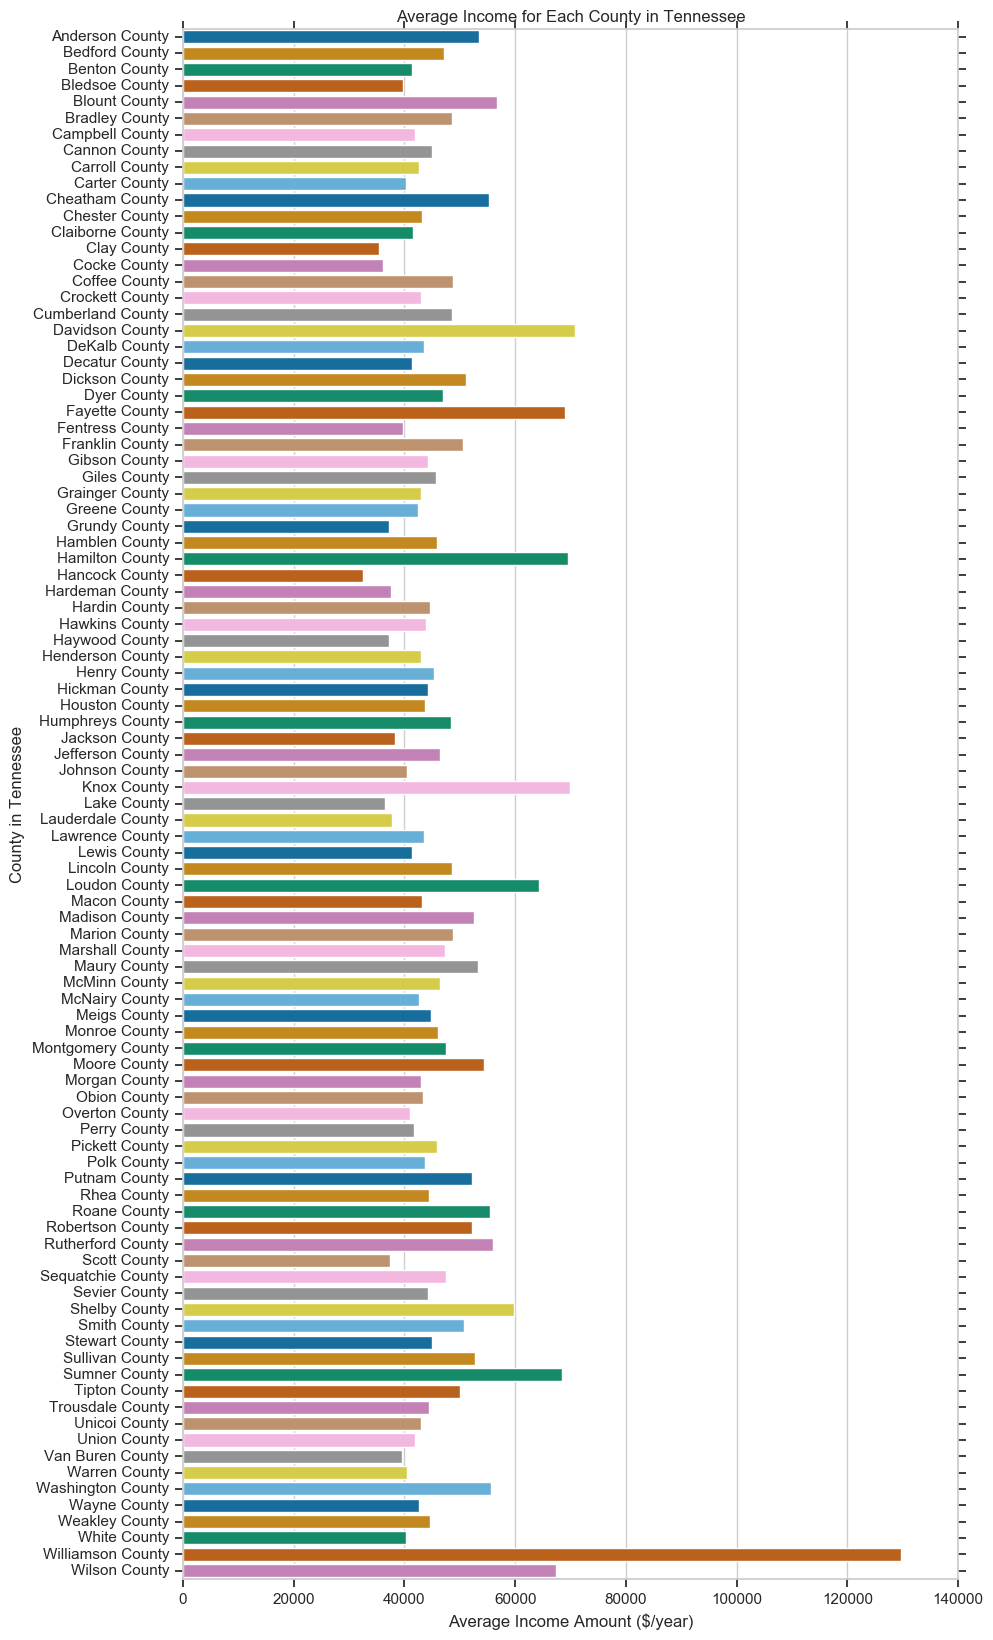

In [52]:
plt.figure(figsize = (10, 20))
sns.set(style="whitegrid")
sns.barplot('avg_income', 'county', data = income_county_agg1, palette = 'colorblind')
plt.xlabel('Average Income Amount ($/year)')
plt.ylabel('County in Tennessee')
plt.title('Average Income for Each County in Tennessee');

Create two more barplots: one to show the total cost of a heart attack by county and the other to show the total cost of cancer by county

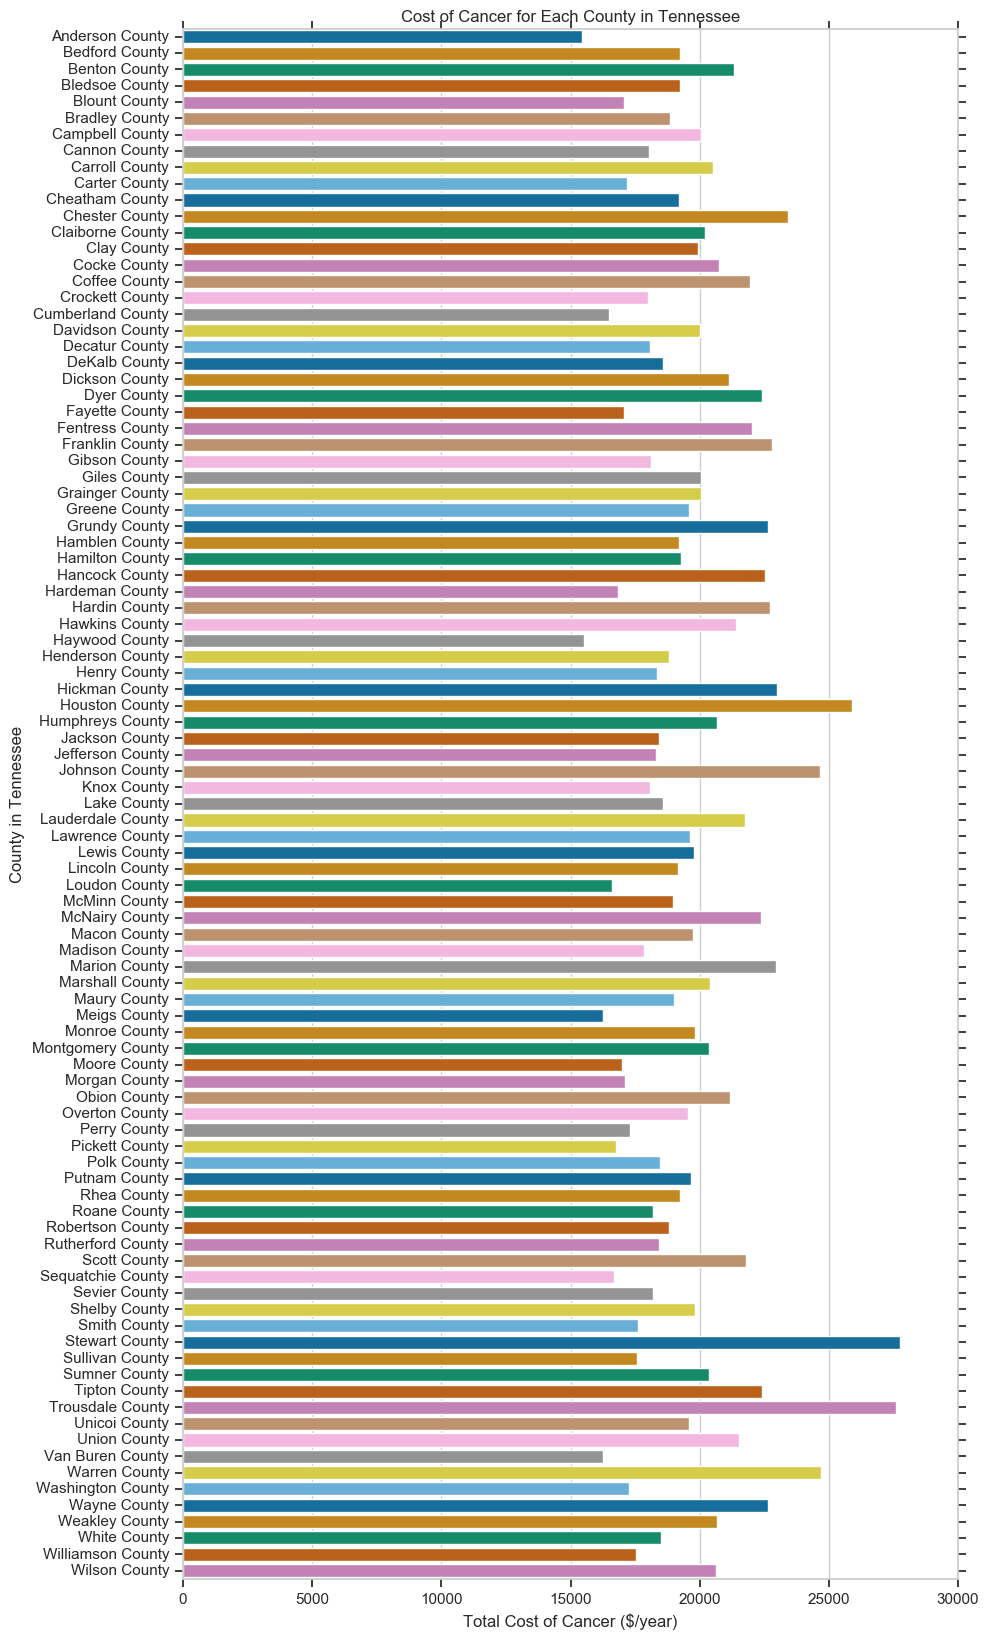

In [53]:
plt.figure(figsize = (10, 20))
sns.set(style="whitegrid")
sns.barplot('analysis_value', 'county', data = TN_cancer, palette = 'colorblind')
plt.xlabel('Total Cost of Cancer ($/year)')
plt.ylabel('County in Tennessee')
plt.title('Cost of Cancer for Each County in Tennessee');

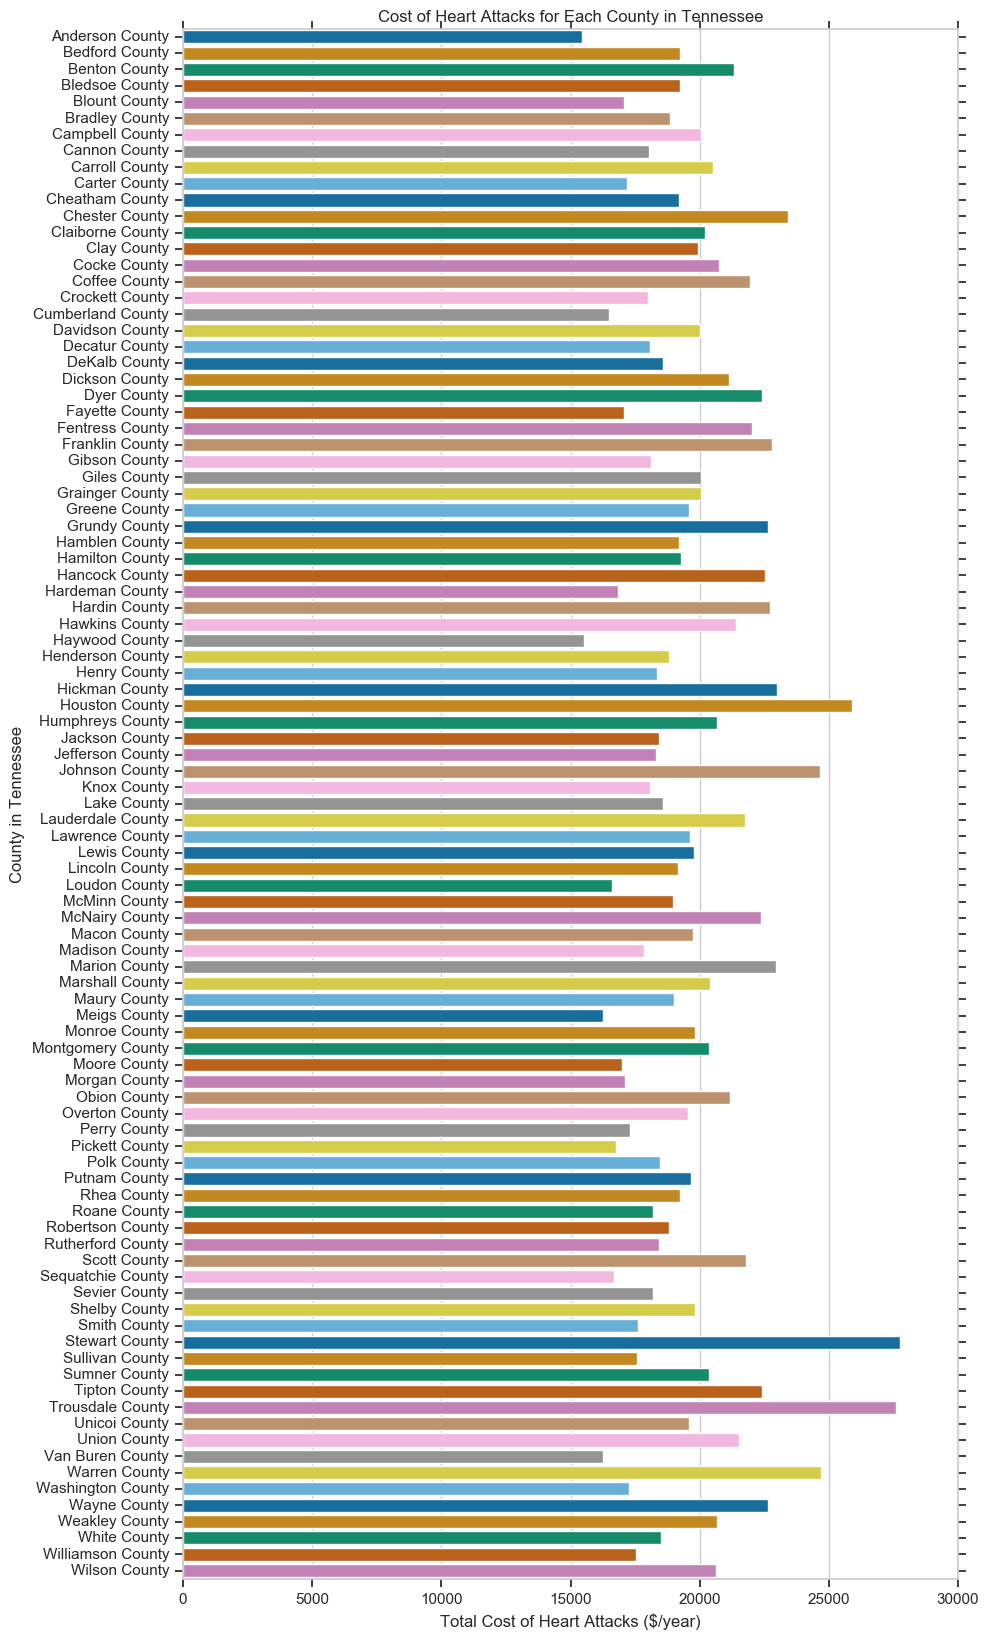

In [54]:
plt.figure(figsize = (10, 20))
sns.set(style="whitegrid")
sns.barplot('analysis_value', 'county', data = TN_cancer, palette = 'colorblind')
plt.xlabel('Total Cost of Heart Attacks ($/year)')
plt.ylabel('County in Tennessee')
plt.title('Cost of Heart Attacks for Each County in Tennessee');

Create a second DataFrame for `tn_ha_costs` - you can name it `tn_ha_costs2` or something similar - by merging tn_ha_costs with income_county_agg and keeping just these four columns:`county`, `urban`, `analysis_value`, `avg_income`.

In [57]:
pd.set_option('display.max_rows', 10)

In [72]:
TN_heart2 = pd.merge(TN_heart, income_county_agg1)

In [84]:
TN_heart2.shape

(91, 30)

In [85]:
TN_heart3 = TN_heart2[['county','urban', 'analysis_value', 'avg_income']]

In [86]:
TN_cancer2 = pd.merge(TN_cancer, income_county_agg1)

In [87]:
TN_cancer2.shape

(95, 30)

In [88]:
TN_cancer3 = TN_cancer2[['county', 'urban', 'analysis_value', 'avg_income']]

Create a `cost_income_ratio` column to compare the total cost (`analysis_value`) to the average annual income. 

In [89]:
c_i_r = []
for index, row_values in TN_heart3.iterrows():
    av=TN_heart3.loc[index,"analysis_value"]
    aai=TN_heart3.loc[index,"avg_income"]
    c_i_r.append(av/aai)
print(c_i_r)

[0.8008130081300813, 0.9264343914445765, 1.07569557110686, 1.0376409017713366, 0.6862254781108019, 0.8240544598235403, 0.9019922033817234, 1.125658992325659, 1.0501735785325577, 1.1227243414851926, 0.5831586934528111, 1.1417711544255684, 1.1458032186566445, 1.6289803523035231, 1.2821137761036947, 1.0037668638810981, 0.8907600111493078, 0.8928173834164845, 0.7174263189126565, 1.5156302927655456, 1.181369737294941, 1.0410604844236455, 0.9801144218294732, 0.6236403190717912, 1.217050169747265, 0.9822564710531515, 1.1008464055975624, 1.0400350416119142, 0.7855011655011656, 1.1276675842921342, 1.1130724038951632, 1.0084297196628111, 0.6467791058499023, 0.9527037805072579, 1.136909832757925, 0.902862356026913, 1.1106485833221431, 0.9450965807396388, 1.1461777885697888, 1.122419012334523, 1.0397489060459575, 1.03107397090684, 0.8070097372002931, 0.7808502836435798, 1.1899753086419753, 0.6061281974291883, 1.3688009440952877, 1.1400497249259416, 1.2080016564671237, 0.9323503062879833, 0.8385492

In [90]:
TN_heart3['cost_income_ratio'] = c_i_r
TN_heart3.head()

/Users/staufferkm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,42749,53382.0,0.800813
1,Bedford County,Rural,43661,47128.0,0.926434
2,Benton County,Rural,44423,41297.0,1.075696
3,Bledsoe County,Rural,41240,39744.0,1.037641
4,Blount County,Urban,38968,56786.0,0.686225


In [91]:
c_i_r = []
for index, row_values in TN_cancer3.iterrows():
    av=TN_cancer3.loc[index,"analysis_value"]
    aai=TN_cancer3.loc[index,"avg_income"]
    c_i_r.append(av/aai)
print(c_i_r)

[0.2894983327713461, 0.4078042777117637, 0.516139186865874, 0.4843498389694042, 0.3006550910435671, 0.387861711535693, 0.47989859613039004, 0.4012012012012012, 0.4810940138862826, 0.42598839228136315, 0.34683480271715567, 0.5428187359491969, 0.4864122578779994, 0.5623588527551943, 0.5747798149891985, 0.4495465432882265, 0.41837777571309115, 0.33960747124067125, 0.2828421260843765, 0.43735785143963224, 0.42636228060112424, 0.4136006735720859, 0.4764031561709096, 0.247643219724438, 0.5534012322394065, 0.450128433115985, 0.40923146371741337, 0.43948751642575556, 0.46703962703962704, 0.4605773981788664, 0.6069962711591598, 0.4184146899300791, 0.27686472819216185, 0.6912166518282012, 0.4474397830594991, 0.5090570775232032, 0.48790055878663474, 0.41710756009131195, 0.4370191301922317, 0.40458268029403327, 0.5194957755387882, 0.593576026942198, 0.4261013102238729, 0.48246256936446447, 0.39507344535277494, 0.6085679012345679, 0.2582965155349662, 0.5103877926283723, 0.575169276343631, 0.4516863

In [92]:
TN_cancer3['cost_income_ratio'] = c_i_r

/Users/staufferkm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Use the `describe()` function to see the statistical description of the ratio. Repeat this for the cancer dataset.

In [93]:
TN_cancer3.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47671.957895,0.432218
std,2436.304533,11741.990528,0.097560
min,15454.000000,32573.000000,0.135063
25%,18103.500000,41817.000000,0.364157
50%,19563.000000,44527.000000,0.430877
75%,21153.000000,50338.500000,0.483406
max,27740.000000,129769.000000,0.691217


In [94]:
TN_heart3.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,47874.252747,0.990191
std,6574.670462,11839.442264,0.215559
min,30831.000000,35424.000000,0.474235
25%,41105.500000,42161.000000,0.853859
50%,45384.000000,44527.000000,1.006337
75%,49698.500000,50338.500000,1.122572
max,62641.000000,129769.000000,1.628980


Create additional plots to investigate the data (for example, you might color the bars by urban vs rural counties; merge the cancer and heart attack cost data and create scatterplots to see if the total cost for cancer is correlated with the total cost for heart attacks, etc.)

Urban vs Rural Counties
    Heart Attack
    Cancer

In [95]:
TN_cancer4 = TN_cancer3.sort_values(by=['urban', 'cost_income_ratio']).reset_index(drop=True)

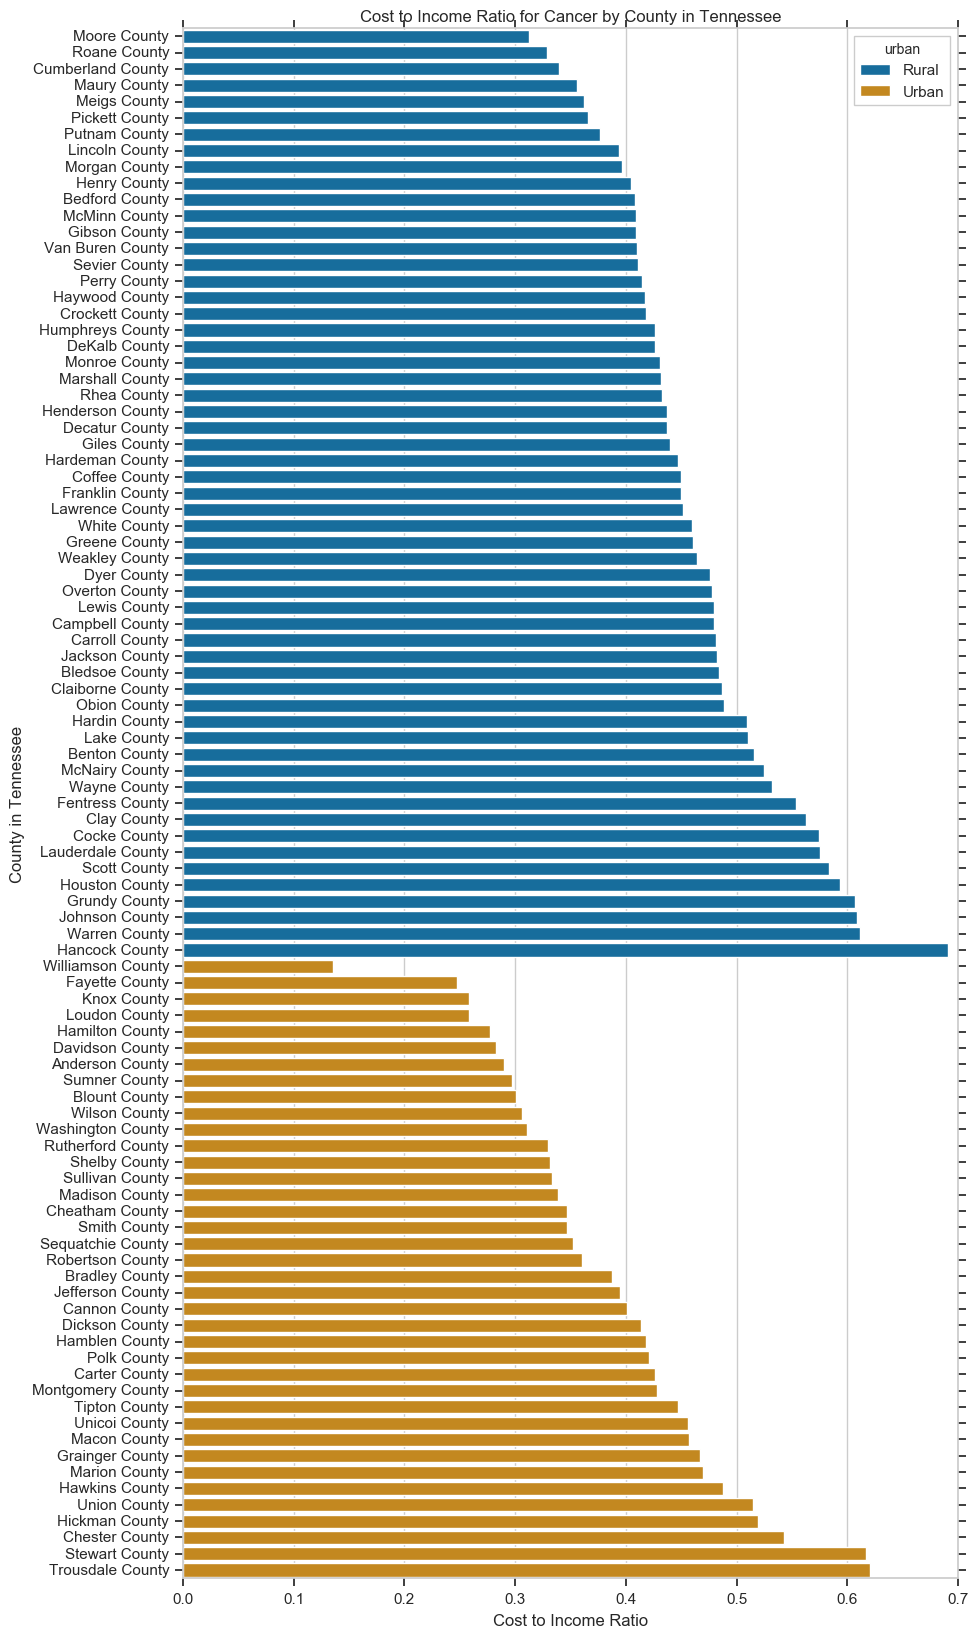

In [96]:
plt.figure(figsize = (10, 20))
sns.set(style="whitegrid")
sns.barplot('cost_income_ratio', 'county', data = TN_cancer4, palette = 'colorblind', hue = 'urban', dodge=False)
plt.xlabel('Cost to Income Ratio')
plt.ylabel('County in Tennessee')
plt.title('Cost to Income Ratio for Cancer by County in Tennessee');

In [97]:
TN_heart4 = TN_heart3.sort_values(by=['urban', 'cost_income_ratio']).reset_index(drop=True)

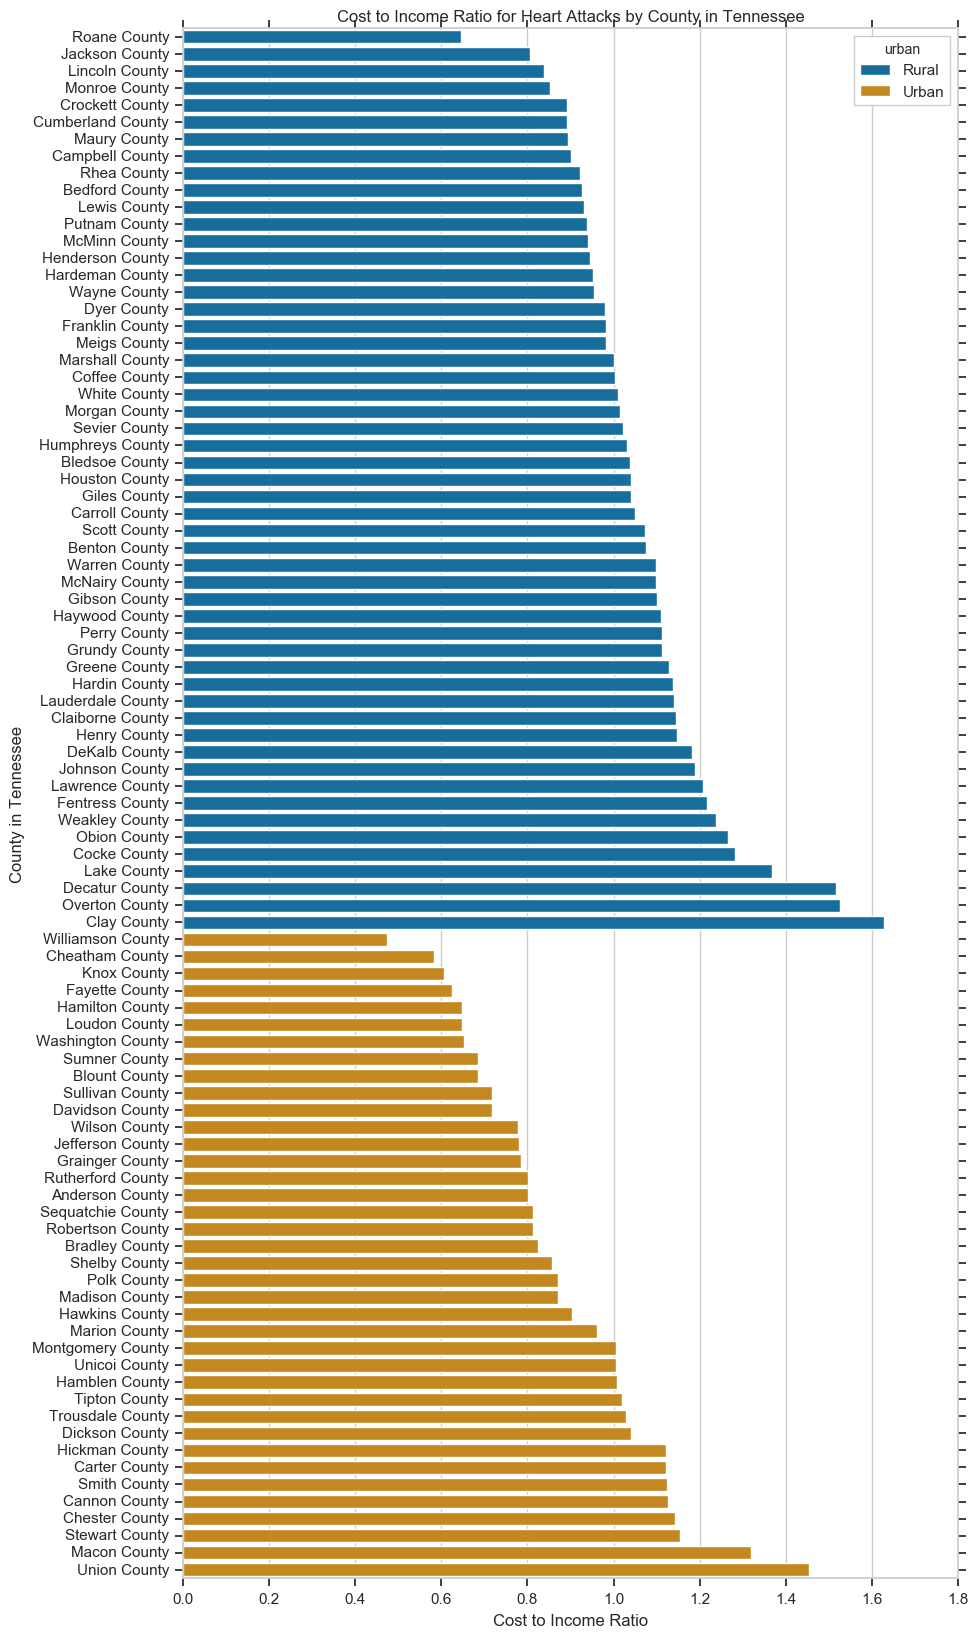

In [98]:
plt.figure(figsize = (10, 20))
sns.set(style="whitegrid")
sns.barplot('cost_income_ratio', 'county', data = TN_heart4, palette = 'colorblind', hue = 'urban', dodge=False)
plt.xlabel('Cost to Income Ratio')
plt.ylabel('County in Tennessee')
plt.title('Cost to Income Ratio for Heart Attacks by County in Tennessee');

Heart Attack vs Cancer

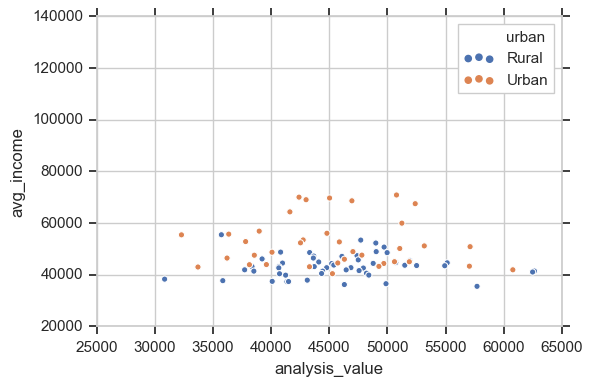

In [99]:
sns.scatterplot(x='analysis_value', y='avg_income', hue='urban', data=TN_heart4)

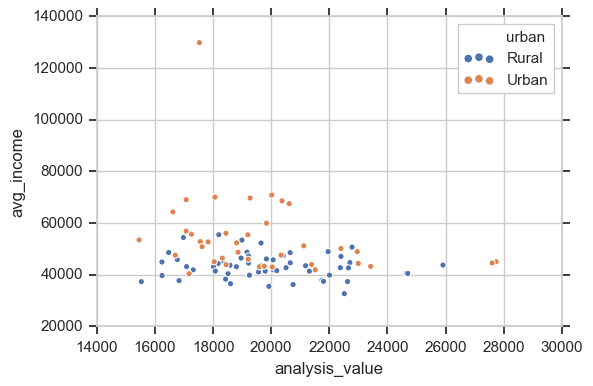

In [100]:
sns.scatterplot(x='analysis_value', y='avg_income', hue='urban', data=TN_cancer4)

In [120]:
#create a dict to rename the column names for TN_heart4, TN_cancer4
TN_heart4.columns = ['county', 'urban', 'analysis_value_heart', 'avg_income', 'cost_income_ratio_heart']

In [121]:
#create a dict to rename the column names for TN_heart4, TN_cancer4
TN_cancer4.columns = ['county', 'urban', 'analysis_value_cancer', 'avg_income', 'cost_income_ratio_cancer']

In [122]:
TN_total = pd.merge(TN_heart4, TN_cancer4, on=('county', 'urban', 'avg_income'))

In [123]:
TN_total.head()

,county,urban,analysis_value_heart,avg_income,cost_income_ratio_heart,analysis_value_cancer,cost_income_ratio_cancer
0,Roane County,Rural,35713,55389.0,0.644767,18196,0.328513
1,Jackson County,Rural,30831,38204.0,0.807010,18432,0.482463
2,Lincoln County,Rural,40808,48665.0,0.838549,19168,0.393877
3,Monroe County,Rural,39216,46034.0,0.851892,19835,0.430877
4,Crockett County,Rural,38349,43052.0,0.890760,18012,0.418378


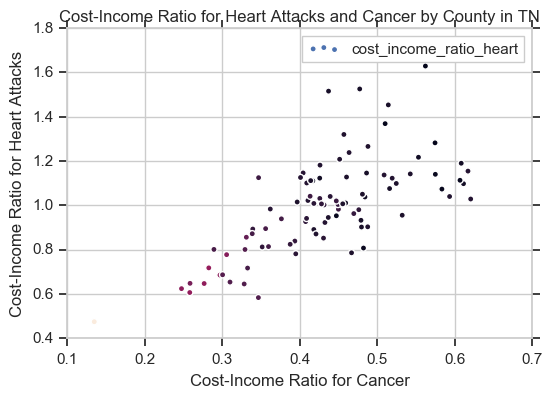

In [127]:
fig, ax = plt.subplots(figsize=(6, 4)) #fig = figure, ax = axes saved in a tuple
ax.scatter(TN_total.cost_income_ratio_cancer, TN_total.cost_income_ratio_heart, c=TN_total.avg_income) #line plot
ax.set_title('Cost-Income Ratio for Heart Attacks and Cancer by County in TN')
ax.set_xlabel('Cost-Income Ratio for Cancer')
ax.set_ylabel('Cost-Income Ratio for Heart Attacks');
#I'd like to figure out how to color the dots by avg_income